In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time
from scipy import stats
from scipy.stats import norm
from scipy.spatial.distance import jensenshannon


import seaborn as sns
sns.set_style("whitegrid")


import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/car_van.csv', index_col=0)

In [3]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
df = pd.DataFrame(dct, index=df.index)

In [6]:
df.to_csv('../../data/testing_select/nomis/car_van.csv')

# Compute values for synthetic data

In [7]:
boroughs = ['City of London', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', '0', '1', '2', '3', '4+', '#vehicles']

In [8]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_select/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [9]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/ciDATGAN/car_van.csv')

In [10]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_select/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [11]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/DATGAN/car_van.csv')

In [12]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [13]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_select/oversample/car_van.csv')

# Compare

In [26]:
orig = pd.read_csv('../../data/testing_select/nomis/car_van.csv', index_col=0)

In [27]:
files = [
    '../../data/testing_select/DATGAN/car_van.csv',
    '../../data/testing_select/ciDATGAN/car_van.csv',
    '../../data/testing_select/oversample/car_van.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [28]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [29]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.17e-01 \pm 6.96e-02
ciDATGAN: 1.38e-01 \pm 7.37e-02
Oversample LTDS: 1.12e-01 \pm 3.59e-02


<AxesSubplot:>

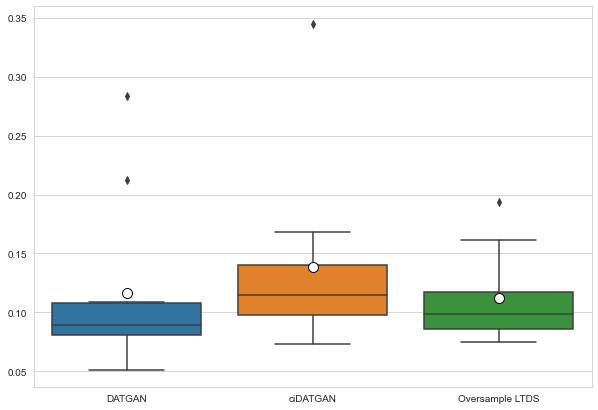

In [30]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [31]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.284000,0.345055,0.193684
1,0.212055,0.168621,0.161026
2,0.061545,0.073107,0.098941
3,0.089270,0.098788,0.095573
4,0.107779,0.122624,0.118206
5,0.085503,0.143372,0.116168
6,0.051572,0.095290,0.081847
7,0.079616,0.106597,0.082609
8,0.089094,0.130694,0.074883
9,0.108489,0.097438,0.098691
